<a href="https://colab.research.google.com/github/awaisshafi6164/mood_analysis_AI_model/blob/Code/Copy_of_mood_analysis_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [29]:
df = pd.read_csv("/content/train.txt",sep=";",
    names=["Description","Emotion"])
df.head(5)

,Description,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [30]:
df['Emotion'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

In [31]:
df['label_num'] = df['Emotion'].map({
    'joy' : 0,
    'sadness': 1,
    'anger': 2,
    'fear': 3,
    'love': 4,
    'surprise':5
})

df.head(5)

,Description,Emotion,label_num
0,i didnt feel humiliated,sadness,1
1,i can go from feeling so hopeless to so damned...,sadness,1
2,im grabbing a minute to post i feel greedy wrong,anger,2
3,i am ever feeling nostalgic about the fireplac...,love,4
4,i am feeling grouchy,anger,2


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.Description,df.label_num,test_size=0.2)

In [33]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (12800,)
Shape of X_test:  (3200,)


In [34]:
y_train.value_counts()

0    4265
1    3738
2    1726
3    1560
4    1062
5     449
Name: label_num, dtype: int64

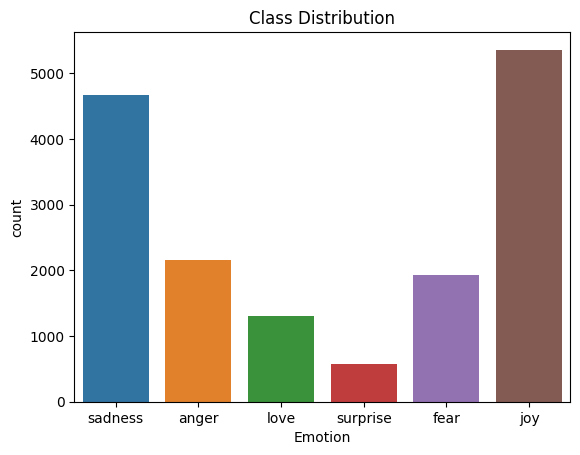

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Emotion', data=df)
plt.title('Class Distribution')
plt.show()

In [36]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [37]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        else:
            filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

In [38]:
df['processed_text'] = df["Description"].apply(preprocess)

In [40]:
df

,Description,Emotion,label_num,processed_text
0,i didnt feel humiliated,sadness,1,not feel humiliate
1,i can go from feeling so hopeless to so damned...,sadness,1,feel hopeless damned hopeful care awake
2,im grabbing a minute to post i feel greedy wrong,anger,2,m grab minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,4,feel nostalgic fireplace know property
4,i am feeling grouchy,anger,2,feel grouchy
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,1,brief time beanbag say anna feel like beat
15996,i am now turning and i feel pathetic that i am...,sadness,1,turn feel pathetic wait table sub teaching degree
15997,i feel strong and good overall,joy,0,feel strong good overall
15998,i feel like this was such a rude comment and i...,anger,2,feel like rude comment m glad t


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('KNN', KNeighborsClassifier())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.84      0.75      1097
           1       0.70      0.79      0.74       928
           2       0.73      0.55      0.63       433
           3       0.77      0.51      0.62       377
           4       0.72      0.41      0.52       242
           5       0.68      0.39      0.49       123

    accuracy                           0.70      3200
   macro avg       0.71      0.58      0.62      3200
weighted avg       0.70      0.70      0.69      3200



In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    df.processed_text,
    df.label_num,
    test_size=0.2,
    random_state=2022,
    stratify=df.label_num
)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('KNN', KNeighborsClassifier())
])

clf.fit(X_train, y_train)

y_pred_knn = clf.predict(X_test)

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.86      0.82      1072
           1       0.78      0.84      0.81       933
           2       0.81      0.77      0.79       432
           3       0.84      0.69      0.76       387
           4       0.73      0.50      0.60       261
           5       0.73      0.57      0.64       115

    accuracy                           0.78      3200
   macro avg       0.78      0.71      0.74      3200
weighted avg       0.78      0.78      0.78      3200



In [44]:
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred_nb = clf.predict(X_test)

print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.64      0.97      0.77      1072
           1       0.69      0.93      0.79       933
           2       0.93      0.38      0.53       432
           3       0.91      0.32      0.48       387
           4       1.00      0.08      0.14       261
           5       1.00      0.01      0.02       115

    accuracy                           0.69      3200
   macro avg       0.86      0.45      0.46      3200
weighted avg       0.77      0.69      0.63      3200



In [45]:
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('Random Forest', RandomForestClassifier())
])

clf.fit(X_train, y_train)

y_pred_rf = clf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1072
           1       0.90      0.88      0.89       933
           2       0.85      0.82      0.83       432
           3       0.81      0.82      0.82       387
           4       0.83      0.67      0.74       261
           5       0.82      0.65      0.72       115

    accuracy                           0.85      3200
   macro avg       0.84      0.79      0.81      3200
weighted avg       0.85      0.85      0.85      3200



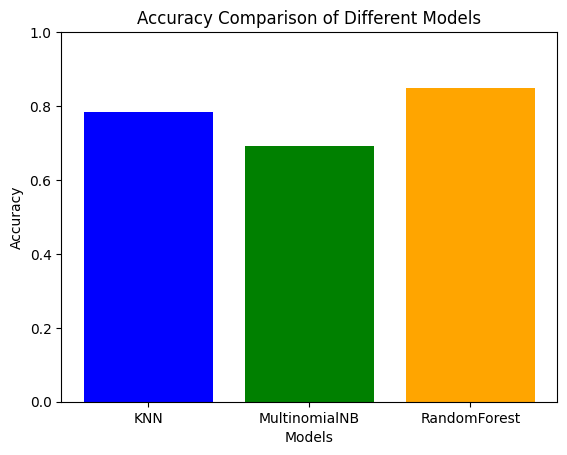

In [46]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

models = ['KNN', 'MultinomialNB', 'RandomForest']
accuracies = [accuracy_knn, accuracy_nb, accuracy_rf]

plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim([0, 1])
plt.show()

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[443, 361, 102,  89,  42,  35],
       [430, 273,  86,  82,  42,  20],
       [182, 153,  42,  30,  16,   9],
       [155, 122,  53,  26,  24,   7],
       [108,  95,  30,  18,  10,   0],
       [ 55,  39,   9,   8,   4,   0]])

Text(95.72222222222221, 0.5, 'Truth')

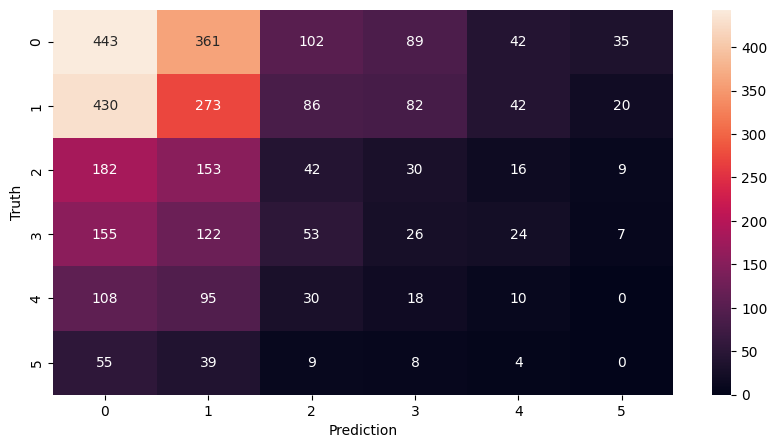

In [48]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

X = df['processed_text']
y = df['label_num']

clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('Random Forest', RandomForestClassifier())
])

clf.fit(X, y)

def predict_emotion(sentence):
    processed_sentence = preprocess(sentence)

    emotion_label = clf.predict([processed_sentence])[0]
    emotion_mapping = {0: 'joy', 1: 'sadness', 2: 'anger', 3: 'fear', 4: 'love', 5: 'surprise'}
    predicted_emotion = emotion_mapping[emotion_label]

    return predicted_emotion

In [50]:
def get_user_input():
    # Enter your desired input value or logic
    return "To unwind, I took a long walk in the evening, appreciating the beauty of nature and the calming effect it had on my mood. As the day comes to an end, I find myself reflecting on the mix of emotions experienced."

user_input = get_user_input()
predicted_emotion = predict_emotion(user_input)
print(f"The predicted emotion for the sentence is: {predicted_emotion}")

The predicted emotion for the sentence is: joy


In [53]:
def get_user_input():
    # Enter your desired input value or logic
    return " In the hushed anticipation of the ordinary, life decides to unveil its extraordinary side. A fleeting moment, pregnant with possibilities, hangs in the air like a suspended gasp. The world seems to pause, catching its breath in anticipation of the unexpected"

user_input = get_user_input()
predicted_emotion = predict_emotion(user_input)
print(f"The predicted emotion for the sentence is: {predicted_emotion}")

The predicted emotion for the sentence is: joy


In [54]:
def get_user_input():
    # Enter your desired input value or logic
    return " The room buzzed with the gentle hum of conversation, and the air was charged with the familiar routine of everyday life. Suddenly, a hush fell over the crowd as the door swung open, revealing an unexpected guest. Gasps of astonishment and wide-eyed expressions painted the room as the surprise unfolded. In that suspended moment, time seemed to stand still, and a collective sense of wonder rippled through the atmosphere. The unexpected visitor, a harbinger of joy, had effortlessly woven a thread of excitement into the fabric of the mundane, leaving behind a trail of smiles and a lingering sense of delightful surprise."

user_input = get_user_input()
predicted_emotion = predict_emotion(user_input)
print(f"The predicted emotion for the sentence is: {predicted_emotion}")

The predicted emotion for the sentence is: love


In [55]:
def get_user_input():
    # Enter your desired input value or logic
    return " In the quiet solitude of a dimly lit room, shadows dance across the walls, mirroring the somber echoes of a heart weighed down by the burden of sorrow. The air is heavy with the scent of melancholy, each breath a reminder of the ache that lingers within. The world outside seems to have lost its vibrant hues, painted instead in muted tones that reflect the desolation within."

user_input = get_user_input()
predicted_emotion = predict_emotion(user_input)
print(f"The predicted emotion for the sentence is: {predicted_emotion}")

The predicted emotion for the sentence is: sadness


In [56]:
def get_user_input():
    # Enter your desired input value or logic
    return " In the enveloping darkness, a sense of foreboding settled like a heavy shroud. The rhythmic pulse of fear quickened, echoing in the stillness, as shadows morphed into unseen terrors. Every creak and rustle became a haunting refrain, playing on the nerves like a macabre melody. The mind, a battleground of anxious whispers, conjured vivid nightmares from the depths of imagination. Dread clung to the air, and a chilling uncertainty gripped the heart. In the face of the unknown, a primal instinct whispered of danger, and the world seemed to shrink, suffocating under the weight of irrational but potent fear."

user_input = get_user_input()
predicted_emotion = predict_emotion(user_input)
print(f"The predicted emotion for the sentence is: {predicted_emotion}")

The predicted emotion for the sentence is: fear


In [57]:
def get_user_input():
    # Enter your desired input value or logic
    return " A simmering rage, hot and unyielding, coursed through veins like molten lava. The air crackled with the intensity of pent-up emotions, and every breath felt like a flame ready to scorch. In the storm of anger, reason became a casualty, drowned out by the thunderous roar of indignation. Fists clenched, jaw tightened, and eyes sparked with a fiery intensity. It was a tempest of emotions, where words became weapons and silence, a seething volcano of unspoken fury. The world blurred through a red haze, and in that moment, control was a fragile illusion shattered by the overwhelming force of anger's tempestuous tide."

user_input = get_user_input()
predicted_emotion = predict_emotion(user_input)
print(f"The predicted emotion for the sentence is: {predicted_emotion}")

The predicted emotion for the sentence is: joy
